In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ms2_peaks_fragments_file = "/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097-ms2peaks-nrtd--0.25-prtd-0.25-nsd--4.0-psd-4.0-mnp-50000.csv"
features_fragments_file = "/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097-features-nrtd--0.25-prtd-0.25-nsd--4.0-psd-4.0-mnp-50000.csv"
db_name = '/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097.sqlite'

In [3]:
# get all the proposed ms2 peaks and the fragments found by MSC
ms2_peaks_fragments_df = pd.read_table(ms2_peaks_fragments_file, sep=",", low_memory=False)

In [36]:
ms2_peaks_fragments_df.head()

,feature_id,ms2_peak_centroid_mz,ms2_peak_intensity,base_peak_id,ms1_scan_centroid,ms1_rt_centroid,ms2_peak_id,ms2_peak_centroid_scan,ms2_rt_centroid,scan_delta,rt_delta,msc_FragMZ,msc_FragInt,msc_FragError,msc_FragIonTypes,msc_FragPos,msc_FragCharge
0,1,195.019,526,1,112.568926,591.934181,23362,116.000000,592.060000,-3.431074,-0.125819,NaN,NaN,NaN,NaN,NaN,NaN
1,1,215.137,178141,1,112.568926,591.934181,872,115.633768,591.708593,-3.064841,0.225588,NaN,NaN,NaN,NaN,NaN,NaN
2,1,233.140,15852,1,112.568926,591.934181,14890,114.275927,592.048900,-1.707001,-0.114719,NaN,NaN,NaN,NaN,NaN,NaN
3,1,253.569,892,1,112.568926,591.934181,22886,115.130045,591.803677,-2.561119,0.130504,NaN,NaN,NaN,NaN,NaN,NaN
4,1,253.974,495,1,112.568926,591.934181,29153,114.060606,591.869697,-1.491680,0.064484,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# get all the features
features_fragments_df = pd.read_table(features_fragments_file, sep=",", low_memory=False).sort_values(by=['msc_DeltaMassPPM'], ascending=True)

In [6]:
ms2_peaks_fragments_df.rename(columns={'peak_centroid_mz': 'ms2_peak_centroid_mz', 'ms2_scan_centroid': 'ms2_peak_centroid_scan'}, inplace=True)

In [148]:
feature_id = 4

In [149]:
feature_peaks_df = ms2_peaks_fragments_df[ms2_peaks_fragments_df.feature_id==feature_id]

In [150]:
msc_matched_df = feature_peaks_df[feature_peaks_df.msc_FragMZ > 0]

In [151]:
db_conn = sqlite3.connect(db_name)
ms2_peaks_df = pd.read_sql_query("select * from ms2_peaks_within_window where feature_id={}".format(feature_id), db_conn)
peak_correlation_df = pd.read_sql_query("select * from peak_correlation where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [152]:
ms2_peaks_df.head()

,feature_id,peak_id,centroid_mz,intensity
0,4,1,871.957,113612862
1,4,2,872.459,105172507
2,4,3,733.886,71256169
3,4,4,872.962,68061875
4,4,5,734.388,61070734


In [153]:
peak_correlation_df.head()

,feature_id,base_peak_id,ms1_scan_centroid,ms1_rt_centroid,ms2_peak_id,ms2_scan_centroid,ms2_rt_centroid,scan_distance,rt_distance,correlation
0,4,3,59.206731,721.085719,1,59.796577,721.122474,-0.589846,-0.036754,0.0
1,4,3,59.206731,721.085719,2,59.844013,721.121072,-0.637282,-0.035353,0.0
2,4,3,59.206731,721.085719,3,59.081886,721.119747,0.124845,-0.034027,0.0
3,4,3,59.206731,721.085719,4,59.805369,721.120729,-0.598638,-0.035010,0.0
4,4,3,59.206731,721.085719,5,59.047534,721.117694,0.159198,-0.031975,0.0


In [154]:
ms2_peaks_df = pd.merge(ms2_peaks_df, peak_correlation_df, how='left', left_on=['feature_id','peak_id'], right_on=['feature_id','ms2_peak_id'])

In [155]:
ms2_peaks_df.head()

,feature_id,peak_id,centroid_mz,intensity,base_peak_id,ms1_scan_centroid,ms1_rt_centroid,ms2_peak_id,ms2_scan_centroid,ms2_rt_centroid,scan_distance,rt_distance,correlation
0,4,1,871.957,113612862,3,59.206731,721.085719,1,59.796577,721.122474,-0.589846,-0.036754,0.0
1,4,2,872.459,105172507,3,59.206731,721.085719,2,59.844013,721.121072,-0.637282,-0.035353,0.0
2,4,3,733.886,71256169,3,59.206731,721.085719,3,59.081886,721.119747,0.124845,-0.034027,0.0
3,4,4,872.962,68061875,3,59.206731,721.085719,4,59.805369,721.120729,-0.598638,-0.035010,0.0
4,4,5,734.388,61070734,3,59.206731,721.085719,5,59.047534,721.117694,0.159198,-0.031975,0.0


In [156]:
len(msc_matched_df)

34

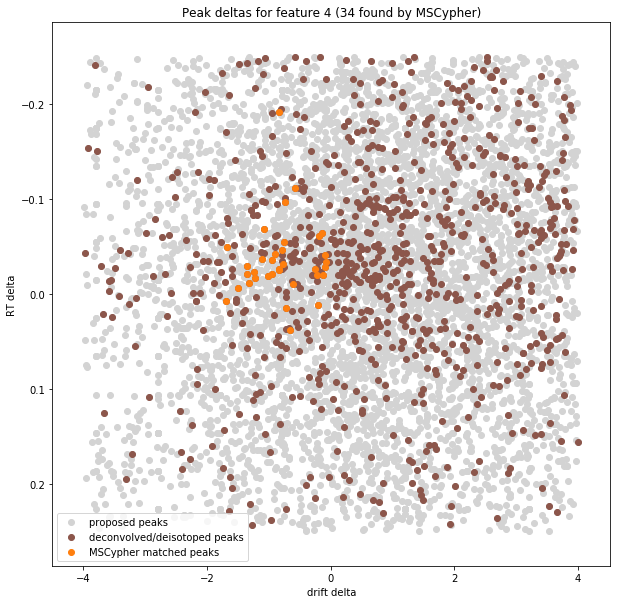

In [157]:
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.scatter(ms2_peaks_df.scan_distance, ms2_peaks_df.rt_distance, marker='o', color='lightgray', label='proposed peaks')
ax1.scatter(feature_peaks_df.scan_delta, feature_peaks_df.rt_delta, marker='o', color='tab:brown', label='deconvolved/deisotoped peaks')
ax1.scatter(msc_matched_df.scan_delta, msc_matched_df.rt_delta, marker='o', color='tab:orange', label='MSCypher matched peaks')
plt.legend(loc='best')
ax1.set_xlabel('drift delta')
ax1.set_ylabel('RT delta')
plt.title("Peak deltas for feature {} ({} found by MSCypher)".format(feature_id, len(msc_matched_df)))
plt.gca().invert_yaxis()
plt.margins(0.06)
plt.show()